# Question proposing & Answering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import folium
import ast

## 1. Các khung giờ, các ngày trong tuần thường xảy ra nhiều và ít vụ án nhất?
**- Mục đích:** 

   + Nhằm phục vụ cho công tác khoanh vùng và dự đoán về thời gian xảy ra vụ án. Từ đó, các lực lượng chức năng sẽ có kế hoạch tăng cường canh gác, tuần tra vào những thời điểm có nguy cơ cao. 
   + Người dân dựa vào đó để phòng tránh cho bản thân mình.
    
**- Cách thực hiện:** 

   + Dựa vào cột `Date`, ta sẽ thống kê các ngày trong tuần theo các khung giờ và lưu vào dataframe `df_time`.
   + Cuối cùng, ta sẽ tìm max, min giá trị của các hàng và cột của `df_time` để có câu trả lời. Bên cạnh đó, `df_time` sẽ được trực quan hóa bằng heatmap, dựa vào đó ta có thể kiểm tra lại kết quả và đưa ra những đánh giá khác. 

In [2]:
# Đọc file Cleaned_Crimes.csv và lưu vào DataFrame
df = pd.read_csv('Cleaned_Crimes.csv')
df['Date'] = pd.to_datetime(df['Date'])

matrix_ = []
for i in range(7):
    matrix_.append([0]*24)
    
for day_data in df['Date']:
    day = day_data.weekday()
    hour = day_data.hour
    matrix_[day][hour] += 1 

day_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_time = pd.DataFrame(matrix_, index=day_of_week)
df_time

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Mon,29,6,13,11,10,6,7,14,19,22,...,12,21,29,18,19,20,13,19,20,13
Tue,38,8,7,10,10,6,3,10,18,19,...,17,30,16,20,28,28,30,24,16,17
Wed,29,11,9,7,4,4,6,13,10,19,...,20,23,22,28,23,22,15,14,18,14
Thu,17,13,7,6,8,9,17,15,14,18,...,24,30,24,26,14,25,20,18,22,14
Fri,34,11,10,3,3,10,10,22,19,25,...,17,20,20,21,17,23,21,18,20,21
Sat,33,12,15,12,16,8,9,9,14,13,...,32,20,21,22,19,24,21,16,19,26
Sun,39,14,16,14,17,11,8,12,9,18,...,17,15,15,25,26,25,29,20,16,21


In [3]:
# Tìm min
min_value_index = df_time.stack().idxmin()
min_day = min_value_index[0]  # Ngày có ít vụ án xảy ra nhất
min_hour = min_value_index[1] # Giờ có ít vụ án xảy ra nhất

# Tìm max 
max_value_index = df_time.stack().idxmax()
max_day = max_value_index[0]  # Ngày có nhiều vụ án xảy ra nhất
max_hour = max_value_index[1] # Giờ có nhiều vụ án xảy ra nhất
print("** TRẢ LỜI CÂU HỎI **")
print(f"- Ngày có nhiều vụ án xảy ra nhất: {max_day}")
print(f"- Giờ có nhiều vụ án xảy ra nhất: {max_hour}")
print(f"- Ngày có ít vụ án xảy ra nhất: {min_day}")
print(f"- Giờ có ít vụ án xảy ra nhất: {min_hour}")

** TRẢ LỜI CÂU HỎI **
- Ngày có nhiều vụ án xảy ra nhất: Sun
- Giờ có nhiều vụ án xảy ra nhất: 0
- Ngày có ít vụ án xảy ra nhất: Tue
- Giờ có ít vụ án xảy ra nhất: 6


Text(0.5, 1.0, 'Thống kê các vụ án tại các khung giờ của các ngày trong tuần')

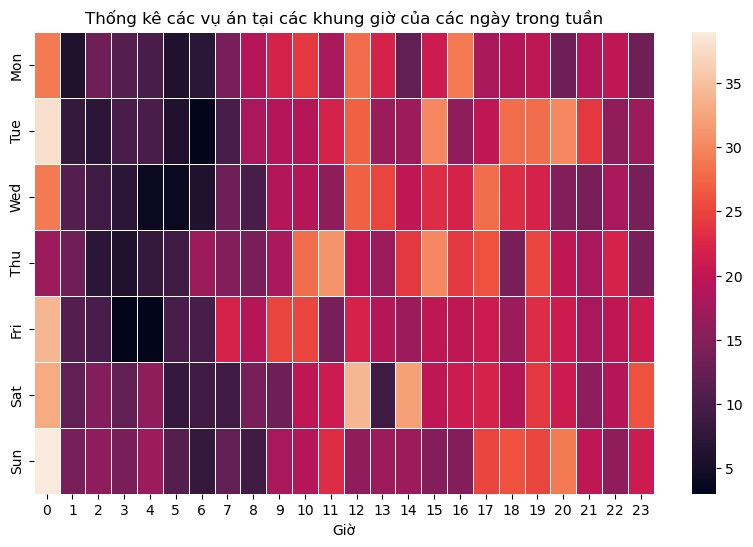

In [4]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(df_time, linewidths=.5, yticklabels = day_of_week)
ax.set_xlabel('Giờ')
ax.set_title('Thống kê các vụ án tại các khung giờ của các ngày trong tuần')

- Dựa vào heatmap, ta đã có cái nhìn cụ thể hơn về kết quả phía trên.
- Các khung giờ từ `1h đến 8h` sẽ có ít nguy cơ xảy ra vụ án nhất.
- Các khung giờ từ `11h đến 23h` sẽ có nguy cơ cao xảy ra các vụ án và `0h` là khung giờ có nguy cơ cao nhất, vì thế mọi người cần cẩn thận và chú ý khung giờ này.

## 2. Tống số vụ án và các loại tội phạm trong những năm gần đây biến đổi như thế nào?
**- Mục đích:** 

   + Đánh giá tổng kết được quá trình quản lí của cơ quan chức năng đã có hiệu quả hiệu quả hay không. Từ đó, sẽ có những chính sách, biện pháp thay đổi kịp thời để quản lí, phòng tránh. 
   + Quan sát được xu hướng các loại tội phạm, loại tội phạm nào chiếm tỉ lệ nhiều nhất và thay đổi ra sao qua từng năm.
    
**- Cách thực hiện:** 
   + Bằng cách group by theo cột `Year`, ta sẽ thống kê số lượng tội phạm của mỗi loại tội phạm ở cột `Primary Type`. Sau đó ta lưu kết quả vào dataframe `type_df`.
   + Ta sẽ tiến hành khảo sát 5 loại tội phạm có số lượng vụ án cao nhất của mỗi năm.
   + Ta sẽ trực quan hóa dữ liệu trên bằng biểu đồ kết hợp đường cột. Trong đó, biểu đồ đường thể hiện tổng số vụ án qua từng năm.  

In [5]:
unique_types = df['Primary Type'].unique().tolist()
# Tạo một DataFrame tạm thời để lưu kết quả thống kê
result_data = []

# Groupby theo 'Year' và thống kê số lượng mỗi loại 'Primary Type'
for year, group in df.groupby('Year'):
    type_counts = group['Primary Type'].value_counts()
    type_counts = type_counts.reindex(unique_types, fill_value=0)  # Đảm bảo có cả các loại không có trong năm này
    result_row = {'Year': year, **type_counts.to_dict()}
    result_data.append(result_row)

type_df = pd.DataFrame(result_data)
type_df

,Year,OTHER OFFENSE,THEFT,BATTERY,ASSAULT,DECEPTIVE PRACTICE,NARCOTICS,OFFENSE INVOLVING CHILDREN,CRIMINAL DAMAGE,MOTOR VEHICLE THEFT,...,SEX OFFENSE,BURGLARY,PUBLIC PEACE VIOLATION,CONCEALED CARRY LICENSE VIOLATION,LIQUOR LAW VIOLATION,ARSON,PROSTITUTION,INTIMIDATION,STALKING,INTERFERENCE WITH PUBLIC OFFICER
0,2020.0,17,81,74,29,64,19,6,54,22,...,1,15,3,0,1,3,1,0,1,1
1,2021.0,79,222,229,142,97,29,13,131,53,...,5,42,3,1,2,3,1,1,1,0
2,2022.0,67,328,232,119,86,31,8,164,136,...,7,40,3,0,3,2,1,2,1,1


In [6]:
top_5_types = {}
for year in type_df['Year']:
    year_data = type_df[type_df['Year'] == year].drop('Year', axis=1).squeeze()
    top_5 = year_data.nlargest(5)
    top_5_types[year] = top_5

total_values = type_df.drop('Year', axis=1).sum(axis=1)
total = pd.DataFrame(total_values)
total.index = ['2020','2021','2022']
total = total.rename(columns={total.columns[0]: 'Total'})
print("** TRẢ LỜI CÂU HỎI **\n")
print("- Top 5 loại tội phạm có số lượng cao nhất qua từng năm: ")
print(pd.DataFrame(top_5_types))
print()
print("- Tổng số vụ án qua từng qua: ")
print(total)

** TRẢ LỜI CÂU HỎI **

- Top 5 loại tội phạm có số lượng cao nhất qua từng năm: 
                     2020.0  2021.0  2022.0
ASSAULT                29.0   142.0   119.0
BATTERY                74.0   229.0   232.0
CRIMINAL DAMAGE        54.0   131.0   164.0
DECEPTIVE PRACTICE     64.0    97.0     NaN
MOTOR VEHICLE THEFT     NaN     NaN   136.0
THEFT                  81.0   222.0   328.0

- Tổng số vụ án qua từng qua: 
      Total
2020    446
2021   1182
2022   1372


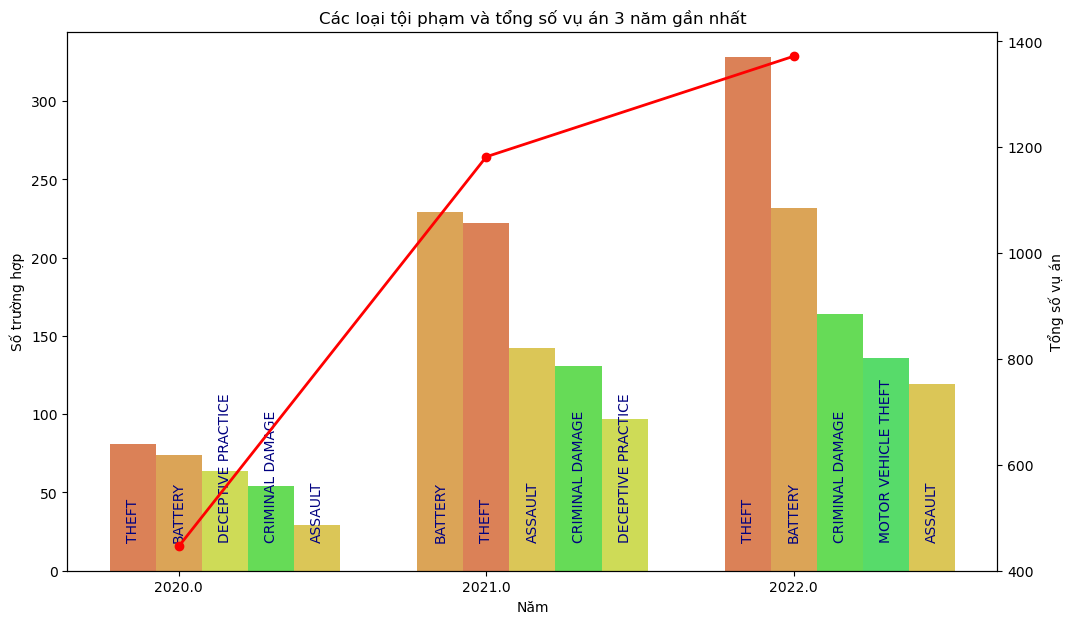

In [7]:
# Lấy tên các loại dữ liệu (loại bỏ cột Year)
types = type_df.drop('Year', axis=1).columns.tolist()
# Tạo một mapping giữa cột dữ liệu và màu sắc
random_colors = sns.color_palette("hls", n_colors=len(types))
colors = {col: color for col, color in zip(types, random_colors)}

bar_width = 0.15  # Độ rộng của mỗi cột

fig, ax1 = plt.subplots(figsize=(12, 7))
# Vẽ biểu đồ cột cho từng năm với top 5 loại dữ liệu và hiển thị tỉ lệ trên đỉnh cột
for i, (year, top_5) in enumerate(top_5_types.items()):
    for j, (type_name, value) in enumerate(top_5.items()):
        ratio = value / total_values[i] * 100  # Tính tỉ lệ
        ax1.bar(i + j * bar_width, value, bar_width, label=type_name, color=colors[type_name])
        ax1.text(i + j * bar_width, 18, type_name, ha='center', va='bottom', rotation=90,color = 'navy')

# Hiển thị tên cột ở chân cột
ax1.set_xlabel('Năm')
ax1.set_ylabel('Số trường hợp')
ax1.set_xticks(np.arange(len(type_df['Year'])) + bar_width * (len(top_5_types) - 1) / 2)
ax1.set_xticklabels(type_df['Year'])
ax1.set_title('Các loại tội phạm và tổng số vụ án 3 năm gần nhất')

# Vẽ biểu đồ đường (tổng giá trị của các loại dữ liệu cho mỗi năm)
ax2 = ax1.twinx()
ax2.plot(np.arange(len(type_df['Year'])) + bar_width * (len(top_5_types) - 1) / 2, total_values, marker='o', linestyle='-', color='red', linewidth=2, label='Total')
ax2.set_ylabel('Tổng số vụ án')

plt.show()

- Dựa vào biểu đồ trên ta thấy tổng số vụ án đều tăng trong 3 năm gần đây. Cụ thể, năm 2021 có số vụ án gần 3 lần năm 2020; năm 2022 tăng so với năm 2021 nhưng không nhiều, điều đó cho thấy cơ quan chức năng đã có hiệu quả trong quản lí khi đã kiềm chế số vụ án tăng cao.
- Dựa vào biểu đồ ta nhận thấy 2 loại tội phạm `THEFT` và `BATTERY` là 2 loại tội phạm chiếm số lượng cao nhất ở các năm gần đây. Ngoài ra, `DECEPTIVE PRACTICE`, `CRIMINAL DAMAGE`, `ASSAULT` và `MOTOR VEHICLE THEFT` cũng là những loại tội phạm có số lượng vụ án cao trong 3 năm gần đây. Do đó, các cơ quan chức năng cần có kế hoạch hợp lí với từng loại tội phạm, để làm giảm số lượng vụ án đến mức thấp nhất trong tương lai.

## 3.  Khu vực nào có tỉ lệ tội phạm nhiều nhất (xảy ra nhiều vụ án nhất)?
**- Mục đích:** 

   + Giúp cho cơ quan chức có thể khoanh vùng khu vực nóng có nhiều tội phạm.  
   + Giúp cho người dân nâng cao cảnh giác, tự bảo vệ chính mình khi đến những khu vực có tỉ lệ tội phạm cao.
    
**- Cách thực hiện:** 
   + Bằng cách thống kê vị trí các vụ án theo kinh độ, vĩ độ (dựa trên cột `Location`). Ta sẽ trực quan hóa vị trí các vụ án lên bản đồ thành phố Chicago, từ đó ta thu được bản đồ mật độ các vụ án theo vị trí. 
   + Dựa vào bản đồ mật độ đó, ta sẽ có cái nhìn từ chi tiết đến tổng quan các khu vực của thành phố Chicago có tỉ lệ tội phạm như thế nào.

In [8]:
# Chuyển đổi kiểu dữ liệu chuỗi thành danh sách tuples (lat, lon)
def convert_to_list(value):
    try:
        # Sử dụng ast.literal_eval để chuyển chuỗi thành tuple
        coordinates = ast.literal_eval(value)
        if isinstance(coordinates, tuple) and len(coordinates) == 2:
            return coordinates
        else:
            return None
    except (SyntaxError, ValueError):
        return None

# Áp dụng hàm convert_to_list vào cột 'location'
coordinates = df['Location'].apply(convert_to_list).tolist()
filtered_coordinates = list(filter(lambda x: x is not None, coordinates))

m = folium.Map(location=[41.8781, -87.6298], zoom_start=10, width='100%', height='100%')  # Chicago: [Vĩ độ, Kinh độ]
# Đánh dấu các điểm trên bản đồ với kích thước nhỏ hơn
for coord in filtered_coordinates:
    folium.CircleMarker(
        location=coord,
        radius=0.00001,  
        color='red',
        fill=True,
        fill_color='blue',
        opacity=0.4 
    ).add_to(m)

# Hiển thị bản đồ
m

**TRẢ LỜI CÂU HỎI**
- Dựa vào bản đồ mật độ các vụ án theo vị trí của thành phố Chicago bên trên, ta thấy rằng tỉ lệ xảy ra các vụ án phân bố gần như đều khắp thành phố. Tuy nhiên, vẫn nổi bật 1 vài khu vực có mật độ các vụ án xảy ra cao.
- Bản đồ mật độ sẽ rất hữu ích cho cơ quan chức năng ở từng khu vực để có có kế hoạch phù hợp để quản lí. Đồng thời dựa vào bản đồ này, người dân trong thành phố có thể nâng cao cảnh giác và bảo vụ chính bản thân mình.

## 4. Số lượng và tỉ lệ các vụ án có liên quan đến gia đình qua từng quý trong năm?
**- Mục đích:** 
   + Cho chúng ta biết được tỉ lệ các vụ án liên quan đến gia đình. Từ đó, đánh giá được vai trò của gia đình trong việc làm giảm thiểu số lượng các vụ án.  
   + Đồng thời, dựa vào đó ta có thể đánh giá việc áp dụng những chính sách, phương pháp giảm số vụ án từ gia đình đã có hiệu quả hay chưa.
    
**- Cách thực hiện:** 
   + Ta sẽ group by cột `Date` theo từng quý trong năm. Ta sẽ tính tổng số vụ án liên quan đến gia đình của từng quý lưu vào cột `Count`, tính tỉ lệ các vụ án vào cột `True_Percentage` của dataframe `quarterly_counts`.
   + Ta sẽ trực quan hoá dataframe `quarterly_counts` bằng biểu đồ cột, kèm theo đó là chú thích tỉ lệ của từng quý trong năm.

In [9]:
df_dom = df.copy()
# Tạo cột mới để xác định quý
df_dom['Quarter'] = df_dom['Date'].dt.to_period('Q')

# Tính toán số lượng các hàng theo từng quý
quarterly_counts = df_dom[df['Domestic'] == True].groupby('Quarter').size().reset_index(name='Count')

# Tính toán tỉ lệ các hàng có 'Domestic' = 'True' theo từng quý
quarterly_true_percentage = df_dom[df_dom['Domestic'] == True].groupby('Quarter').size() / df_dom.groupby('Quarter').size()
quarterly_counts['True_Percentage'] = quarterly_true_percentage.values * 100
quarterly_counts

,Quarter,Count,True_Percentage
0,2020Q1,5,17.857143
1,2020Q2,20,30.303030
2,2020Q3,18,20.000000
3,2020Q4,53,20.229008
4,2021Q1,72,27.799228
5,2021Q2,69,24.555160
6,2021Q3,86,26.625387
7,2021Q4,72,22.570533
8,2022Q1,52,19.402985
9,2022Q2,69,19.491525


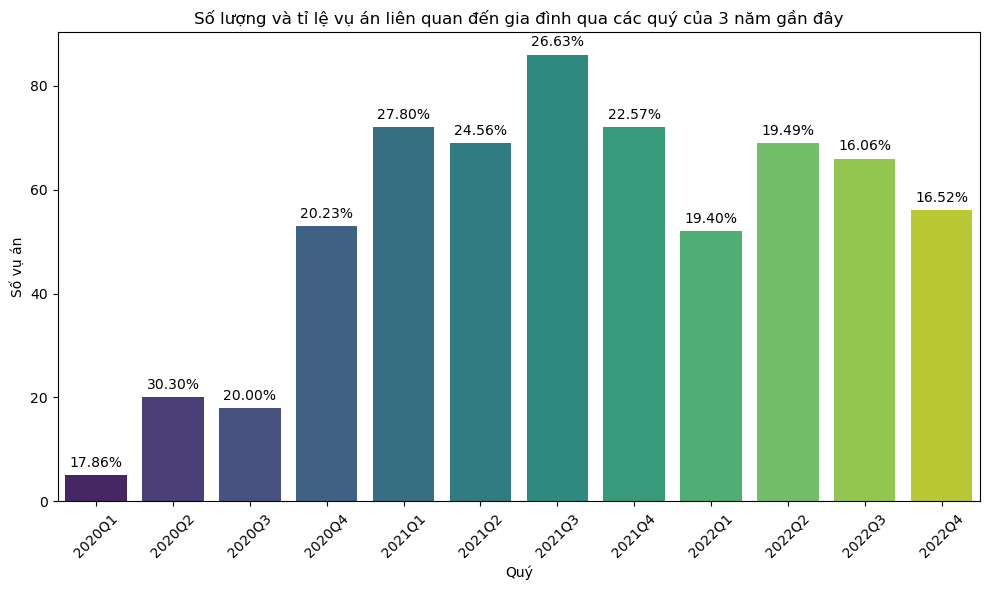

In [10]:
# Vẽ biểu đồ bằng Seaborn
plt.figure(figsize=(10, 6))

# Biểu đồ cột số lượng
sns.barplot(x='Quarter', y='Count', data=quarterly_counts,palette='viridis')

# Thêm chú thích tỉ lệ trên từng cột
for i, value in enumerate(quarterly_counts['True_Percentage']):
    plt.text(i, quarterly_counts['Count'][i] + 1, f"{value:.2f}%", ha='center', va='bottom')

# Đặt nhãn và tiêu đề biểu đồ
plt.xlabel('Quý')
plt.ylabel('Số vụ án')
plt.title('Số lượng và tỉ lệ vụ án liên quan đến gia đình qua các quý của 3 năm gần đây')

plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

**TRẢ LỜI CÂU HỎI** 
- Năm 2020: có tỉ lệ trung bình các vụ án liên quan đến gia đình là 22,02%; quý 4 trong năm có số lượng vụ án tăng mạnh (tăng gần gấp 2,5 lần so với 2 quý trước đó).
- Năm 2021: có tỉ lệ trung bình các vụ án liên quan đến giá đình là 25,4%; quý 3 trong năm 2021 là quý có số lượng và tỉ lệ các vụ án cao nhất trong các quý được so sánh; và trong năm 2021 các quý đều có số lượng vụ án cao (trên 60 vụ).
- Năm 2022: có tỉ lệ trung bình các vụ án liên quan đến giá đình là 17,87%; thấy được được sự sụt giảm đáng kể về số vụ và tỉ lệ từ quý 4 năm 2021 sang quý 1 năm 2022; 3 quý cuối năm 2022 số vụ là tỉ lệ vẫn giữ ổn định, không có biến động quá nhiều.

**Tổng kết**
- Những vụ án liên quan đến gia đình bao gồm bạo lực gia đình, trẻ em, bạo lực và quấy rối tình dục,...
- Thông qua những thống kê về số lượng và tỉ lệ vụ án liên quan đến gia đình ở phía trên, ta nhận thấy các vụ án liên quan đến gia đình vẫn chiếm tỉ lệ rất cao. Đó chính là những con số đáng báo động, cần có những biện pháp thích hợp hơn để kéo giảm kể cả số lượng và tỉ lệ vụ án liên quan đến giá đình đến mức thấp nhất.  